In [ ]:
import pandas as pd

In [ ]:
df= df = pd.read_csv('Data-GP1.csv')

In [ ]:
df

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat
0,1,188.663422,10/9/19,10/10/18,A,1,1,0,0,A
1,1,358.428869,5/27/19,6/6/18,B,1,0,1,0,A
2,1,356.372684,5/31/20,6/17/19,B,1,0,1,0,A
3,1,396.370505,12/10/19,12/27/18,C,1,0,1,0,A
4,1,364.264552,5/31/20,6/19/19,B,2,0,1,0,A
...,...,...,...,...,...,...,...,...,...,...
209692,4,468.650069,3/26/19,3/26/19,L,4,0,0,0,B
209693,1,468.659177,12/21/18,12/21/18,J,1,0,0,1,B
209694,1,668.061946,6/9/19,6/9/19,J,10,0,0,0,B
209695,2,381.438513,1/17/19,1/17/19,L,17,0,0,0,B


In [ ]:
print(df.head())
print(df.info())

   num_seats_total  mean_net_ticket_price Dept_Date Purchase_Date  \
0                1             188.663422   10/9/19      10/10/18   
1                1             358.428869   5/27/19        6/6/18   
2                1             356.372684   5/31/20       6/17/19   
3                1             396.370505  12/10/19      12/27/18   
4                1             364.264552   5/31/20       6/19/19   

  Train_Number_All  Culmulative_sales  isNormCabin  isReturn  isOneway  \
0                A                  1            1         0         0   
1                B                  1            0         1         0   
2                B                  1            0         1         0   
3                C                  1            0         1         0   
4                B                  2            0         1         0   

  Customer_Cat  
0            A  
1            A  
2            A  
3            A  
4            A  
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df['Dept_Date'] = pd.to_datetime(df['Dept_Date'], errors='coerce')
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df['days_to_departure'] = (df['Dept_Date'] - df['Purchase_Date']).dt.days
df.info()
df[['num_seats_total','mean_net_ticket_price','days_to_departure']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209697 entries, 0 to 209696
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   num_seats_total        209697 non-null  int64         
 1   mean_net_ticket_price  209697 non-null  float64       
 2   Dept_Date              209697 non-null  datetime64[ns]
 3   Purchase_Date          209697 non-null  datetime64[ns]
 4   Train_Number_All       209697 non-null  object        
 5   Culmulative_sales      209697 non-null  int64         
 6   isNormCabin            209697 non-null  int64         
 7   isReturn               209697 non-null  int64         
 8   isOneway               209697 non-null  int64         
 9   Days_to_Departure      209697 non-null  int64         
 10  Cabin_Type_Special     209697 non-null  bool          
 11  Trip_Type_Return       209697 non-null  bool          
 12  Customer_Cat_B         209697 non-null  bool

,num_seats_total,mean_net_ticket_price,days_to_departure
count,209697.000000,209697.000000,209697.000000
mean,2.383019,230.116900,63.264596
std,2.083324,147.024784,65.050759
min,1.000000,1.278969,0.000000
25%,1.000000,108.870193,15.000000
50%,2.000000,186.282199,39.000000
75%,3.000000,350.409481,91.000000
max,66.000000,7855.766106,364.000000


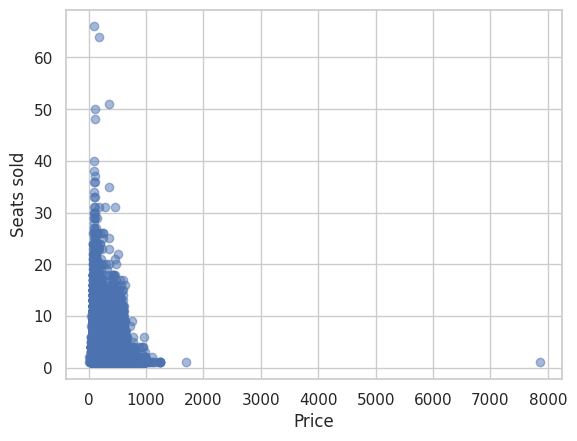

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['mean_net_ticket_price'], df['num_seats_total'], alpha=0.5)
plt.xlabel('Price'); plt.ylabel('Seats sold'); plt.show()

In [ ]:
import numpy as np
df['log_price'] = np.log(df['mean_net_ticket_price'].where(df['mean_net_ticket_price']>0))
df['log_num_seats_total'] = np.log(df['num_seats_total'].where(df['num_seats_total']>0))

In [ ]:
print(df.columns.tolist())

['num_seats_total', 'mean_net_ticket_price', 'Dept_Date', 'Purchase_Date', 'Train_Number_All', 'Culmulative_sales', 'isNormCabin', 'isReturn', 'isOneway', 'Days_to_Departure', 'Cabin_Type_Special', 'Trip_Type_Return', 'Customer_Cat_B', 'log_demand', 'Price_x_Cabin', 'days_to_departure', 'log_price', 'log_num_seats_total']


In [ ]:
formula_ols = "log_num_seats_total ~ log_price + days_to_departure + isNormCabin + isReturn + isOneway + C(Customer_cat)"

In [ ]:
import statsmodels.formula.api as smf

# Base formula (always present variables)
formula_ols = "log_num_seats_total ~ log_price + days_to_departure + isNormCabin + isReturn + isOneway"

# Add Customer_Cat only if column exists
if "Customer_Cat" in df.columns:
    formula_ols += " + C(Customer_Cat)"

# Add Train_Number_All fixed effects only if few categories
if "Train_Number_All" in df.columns and df["Train_Number_All"].nunique() <= 8:
    formula_ols += " + C(Train_Number_All)"

# Run the model on rows where required vars are not missing
ols_df = df.dropna(subset=["log_num_seats_total","log_price","days_to_departure"])
ols_model = smf.ols(formula=formula_ols, data=ols_df).fit(cov_type="HC3")

print(ols_model.summary())

                             OLS Regression Results                            
Dep. Variable:     log_num_seats_total   R-squared:                       0.091
Model:                             OLS   Adj. R-squared:                  0.091
Method:                  Least Squares   F-statistic:                     4180.
Date:                 Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                         16:24:28   Log-Likelihood:            -2.0091e+05
No. Observations:               209697   AIC:                         4.018e+05
Df Residuals:                   209691   BIC:                         4.019e+05
Df Model:                            5                                         
Covariance Type:                   HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6901

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# --- Build formula safely ---
formula_pois = "num_seats_total ~ log_price + days_to_departure + isNormCabin + isReturn + isOneway"

# Add Customer_Cat if available
if "Customer_Cat" in df.columns:
    formula_pois += " + C(Customer_Cat)"

# Add Train_Number_All if categories are few
if "Train_Number_All" in df.columns and df["Train_Number_All"].nunique() <= 8:
    formula_pois += " + C(Train_Number_All)"

# --- Prepare data (drop missing rows for vars in formula) ---
pois_df = df.dropna(subset=["num_seats_total","log_price","days_to_departure"])

# --- Poisson GLM ---
pois_model = smf.glm(formula=formula_pois, data=pois_df, family=sm.families.Poisson()).fit()
print("=== Poisson GLM Results ===")
print(pois_model.summary())

# --- Negative Binomial GLM ---
nb_model = smf.glm(formula=formula_pois, data=pois_df, family=sm.families.NegativeBinomial()).fit()
print("\n=== Negative Binomial GLM Results ===")
print(nb_model.summary())


=== Poisson GLM Results ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:        num_seats_total   No. Observations:               209697
Model:                            GLM   Df Residuals:                   209691
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.9408e+05
Date:                Wed, 10 Sep 2025   Deviance:                   2.5094e+05
Time:                        16:27:01   Pearson chi2:                 3.46e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1052
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



=== Negative Binomial GLM Results ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:        num_seats_total   No. Observations:               209697
Model:                            GLM   Df Residuals:                   209691
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.2730e+05
Date:                Wed, 10 Sep 2025   Deviance:                       66317.
Time:                        16:27:02   Pearson chi2:                 1.02e+05
No. Iterations:                     7   Pseudo R-squ. (CS):            0.03163
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [ ]:
formula_nb = "num_seats_total ~ log_price + days_to_departure + isNormCabin + isReturn + isOneway + C(Train_Number_All)"

In [ ]:
formula_nb += " + days_to_departure + I(days_to_departure**2)"

In [ ]:
formula_nb += " + C(Customer_Cat) + log_price:C(Customer_Cat)"

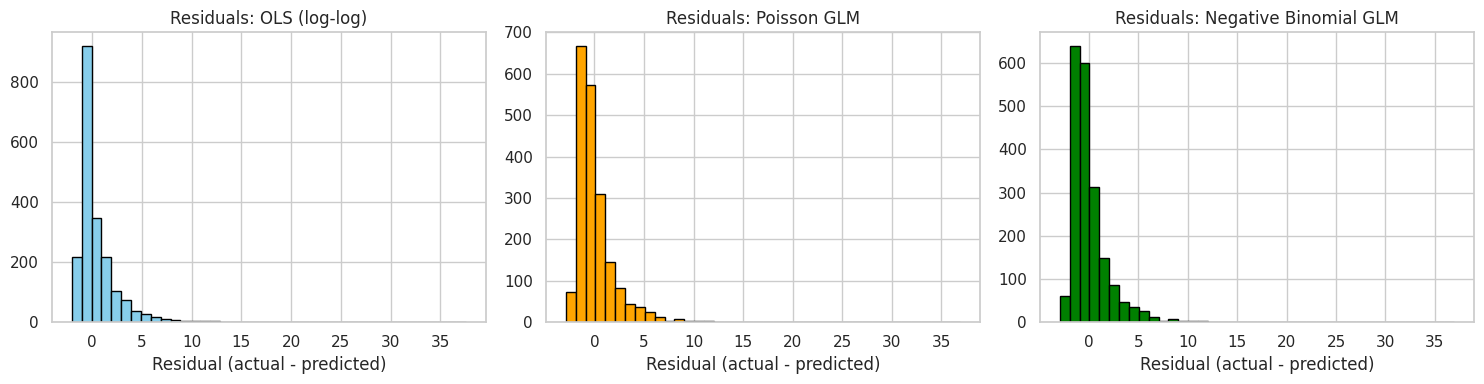

Mean residuals (should be ~0 if unbiased):
OLS: 0.510
Poisson: 0.020
NegBin: 0.021


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute residuals for a sample ---
n_sample = 2000
sample_df = df.sample(n=n_sample, random_state=123)

# Predictions
ols_pred = ols_model.predict(sample_df)
pois_pred = pois_model.predict(sample_df)
nb_pred = nb_model.predict(sample_df)

# Actuals
y_true = sample_df["num_seats_total"]

# Residuals (actual - predicted)
resid_ols = y_true - np.exp(ols_pred)   # OLS was on log scale
resid_pois = y_true - pois_pred
resid_nb = y_true - nb_pred

# --- Plot histograms of residuals ---
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(resid_ols, bins=40, color="skyblue", edgecolor="black")
plt.title("Residuals: OLS (log-log)")
plt.xlabel("Residual (actual - predicted)")

plt.subplot(1,3,2)
plt.hist(resid_pois, bins=40, color="orange", edgecolor="black")
plt.title("Residuals: Poisson GLM")
plt.xlabel("Residual (actual - predicted)")

plt.subplot(1,3,3)
plt.hist(resid_nb, bins=40, color="green", edgecolor="black")
plt.title("Residuals: Negative Binomial GLM")
plt.xlabel("Residual (actual - predicted)")

plt.tight_layout()
plt.show()

# --- Optional: summary stats of residuals ---
print("Mean residuals (should be ~0 if unbiased):")
print(f"OLS: {resid_ols.mean():.3f}")
print(f"Poisson: {resid_pois.mean():.3f}")
print(f"NegBin: {resid_nb.mean():.3f}")